In [6]:
import pandas as pd
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

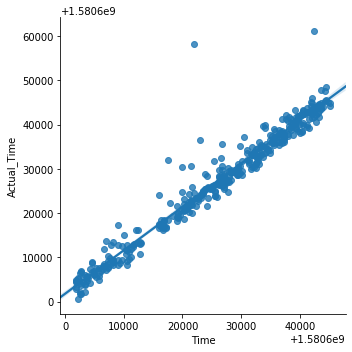

In [48]:
data = pd.DataFrame(
    pd.read_csv(
        "../Datasets/FinalMergedDataset/cleaned_numeric_dataset.csv"
        )
)
data.head()
data = data[:][:400]
import seaborn as sns
sns.lmplot(x = "Time" , y="Actual_Time",data = data,order = 2)

In [49]:
X = np.array(data["Time"]).reshape(-1,1)
Y = np.array(data["Actual_Time"]).reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [50]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

print("Coefficients : {}".format(model.coef_))
print("Variance score : {}".format(model.score(X_test,Y_test)))

Coefficients : [[0.97511585]]
Variance score : 0.9513594101681853


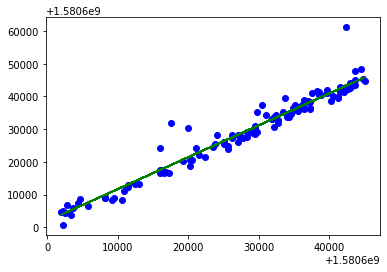

In [51]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test , color="b")
plt.plot(X_test,Y_pred,color="g")
plt.show()


Estimated Coeficient b0 = 30722927.69168377 , b1= 0.9805636320206904


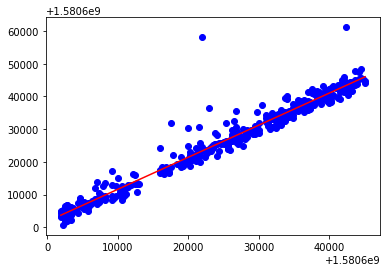

In [52]:
def estimate_coef(x,y):
    n = np.size(x)

    m_x,m_y = np.mean(x) , np.mean(y)

    SS_xy = np.sum(y*x) - n*m_x * m_y
    SS_xx = np.sum(x*x) - n*m_x * m_x

    b1 = SS_xy/SS_xx
    b0 = m_y - b1*m_x

    return (b0,b1)

def plot_line(x,y,b):
    plt.scatter(x,y,color = "blue")

    y_pred = b[0] + b[1]*x
    plt.plot(x,y_pred,color="red")
    plt.show()

x= np.array(data["Time"])
y = np.array(data["Actual_Time"])

b = estimate_coef(x,y)
print("Estimated Coeficient b0 = {} , b1= {}".format(b[0],b[1]))

plot_line(x,y,b)